In [1]:
#Data
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
#from tqdm import tqdm

#Metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from scipy import stats

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

sns.set()

np.random.seed(31415)

In [2]:
#import dataframes
df1 = pd.read_csv('ransom_w_class.csv')
df2 = pd.read_csv('benign_complete.csv')

#drop extra first column
df1 = df1.drop(df1.columns[0], axis=1)
df2 = df2.drop(df2.columns[0], axis=1)
df2 = df2.drop(df2.columns[0], axis=1)

#remove the name column (string)
df1 = df1.drop('Name', axis=1)
df2 = df2.drop('Name', axis=1)

In [3]:
# Check for duplicated rows
bool_series = df1.duplicated(keep = 'last').sum()
bool_series2 = df2.duplicated().sum()
print("total rows:  Ransom:" + str(len(df1)) + " | Benign: " + str(len(df2)))
print("duplicated rows: Ransom:" + str(bool_series) + " | Benign: " + str(bool_series2))

total rows:  Ransom:1790 | Benign: 2446
duplicated rows: Ransom:1664 | Benign: 951


In [4]:
# Remove duplicated rows
# df1 = df1.drop_duplicates(keep = 'last')
df2 = df2.drop_duplicates(keep = 'last')
# bool_series = df1.duplicated().sum()
# bool_series2 = df2.duplicated().sum()
# print("duplicated rows:  ransom:" + str(bool_series) + " |  benign: " + str(bool_series2))

In [5]:
print("total rows:  Ransom:" + str(len(df1)) + " | Benign: " + str(len(df2)))

total rows:  Ransom:1790 | Benign: 1495


In [6]:
#label the dataframes
df1['label'] = 'Ransomware'
df2['label'] = 'Benign'

#shrink benign
df2 = df2.sample(frac=1)
#df2 = df2.iloc[0:2000]

#join the dataframes into 1 dataframe (df3)
frames = [df1, df2]
df3 = pd.concat(frames)

#shuffle!
df3 = df3.sample(frac=1)
df1 = df1.sample(frac=1)
df2 = df2.sample(frac=1)

In [7]:
df3

,total smalis,receiver,service,activity,READ_CALENDAR,WRITE_CALENDAR,CAMERA,READ_CONTACTS,WRITE_CONTACTS,GET_ACCOUNTS,...,shareIntent,readPhoneNumber,FileInputStream,getSharedPreferences,telephony,getMessageBody,getDisplayOriginatingAddress,wallpaper,crypto,label
526,2693,2,2,1,0,0,0,0,0,0,...,0,0,22,5,1,0,0,0,10843,Ransomware
2371,13669,16,25,192,0,0,1,0,0,0,...,0,0,223,102,90,0,0,0,207,Benign
2305,2149,1,0,4,0,0,0,0,0,0,...,0,0,27,6,3,0,0,0,5,Benign
21,46,2,7,5,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,Ransomware
121,458,1,0,18,0,0,0,0,0,0,...,0,0,14,45,0,0,0,0,27,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2044,4068,6,7,56,0,0,1,1,1,0,...,0,0,46,32,7,0,0,0,51,Benign
607,197,3,2,3,1,1,1,1,1,1,...,0,0,2,7,23,0,0,0,0,Ransomware
10,3,2,7,5,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,Ransomware
2309,4033,9,12,35,1,1,1,1,1,1,...,0,0,50,40,26,0,0,0,94,Benign


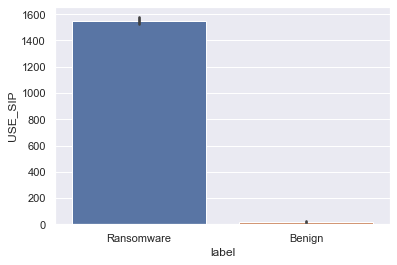

In [8]:
#from numpy import count_nonzero
#estimator=count_nonzero if you want counts, not avg
from numpy import count_nonzero

sns.barplot(y=df3['USE_SIP'], x = df3['label'] , estimator = count_nonzero)
plt.show()

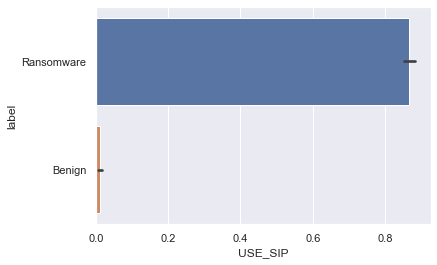

In [9]:
sns.barplot(x = df3['USE_SIP'], y = df3['label'])
plt.show()

In [10]:
#Visualize data
#df2.describe()
df3.describe()

,total smalis,receiver,service,activity,READ_CALENDAR,WRITE_CALENDAR,CAMERA,READ_CONTACTS,WRITE_CONTACTS,GET_ACCOUNTS,...,getExternalCacheDir,shareIntent,readPhoneNumber,FileInputStream,getSharedPreferences,telephony,getMessageBody,getDisplayOriginatingAddress,wallpaper,crypto
count,3285.000000,3285.000000,3285.000000,3285.000000,3285.000000,3285.000000,3285.000000,3285.000000,3285.000000,3285.000000,...,3285.000000,3285.000000,3285.000000,3285.000000,3285.000000,3285.000000,3285.000000,3285.000000,3285.000000,3285.000000
mean,3348.473973,3.942161,6.913546,19.216438,0.488889,0.487062,0.590563,0.528158,0.491629,0.554033,...,2.000913,0.003957,0.003957,33.134855,25.687062,9.841705,0.214916,0.011568,3.512329,101.167732
std,6541.254681,7.749288,10.943847,92.086230,0.499953,0.499909,0.491805,0.499282,0.500006,0.497147,...,4.047412,0.131686,0.062793,63.505160,54.687497,29.421170,2.417977,0.155649,44.511138,1018.219002
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,72.000000,2.000000,6.000000,5.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4817.000000,3.000000,7.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,3.000000,0.000000,0.000000,47.000000,31.000000,8.000000,0.000000,0.000000,0.000000,38.000000
max,83550.000000,148.000000,196.000000,4152.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,43.000000,6.000000,1.000000,723.000000,651.000000,512.000000,82.000000,6.000000,1064.000000,32323.000000


In [11]:
# Define Validation method
# Train and validation set split
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

array = df3.values

#All of the non-label columns
X = array[:, 0:-1]

#label column
y = array[:, -1]

#USING CHI2 (current (X_new))
z = SelectKBest(chi2, k=25)
X_new = z.fit_transform(X, y)
X_new.shape

#Obtain the train/validation datasets on a 80/20 split
#TODO same w/ tenfold cross val
# compare results
#X_train, X_validation, Y_train, Y_validation = train_test_split(X_new, y, test_size=0.30, random_state=12)

(3285, 25)

In [12]:
cols = z.get_support(indices=True)
features_df_new = df3.iloc[:,cols]
list(features_df_new.columns)

['total smalis',
 'receiver',
 'service',
 'activity',
 'RECEIVE_WAP_PUSH',
 'DEVICE_ADMIN_ENABLED',
 'QUICKBOOT_POWERON',
 'REBOOT',
 '.method public',
 '.method private',
 'setReadable',
 'setWritable',
 'Cipher',
 'execSQL',
 'SQLiteDatabase',
 'openConnection',
 'getFilesDir',
 'getCacheDir',
 'getExternalFilesDir',
 'getExternalCacheDir',
 'FileInputStream',
 'getSharedPreferences',
 'telephony',
 'wallpaper',
 'crypto']

In [13]:
from sklearn.ensemble import VotingClassifier

#Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr', max_iter=12000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC(gamma='auto', max_iter=10000)))
models.append(('RF', RandomForestClassifier()))
models.append(('CNN', MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=16, max_iter = 10000)))

# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_new, y, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.982956 (0.006550)
LDA: 0.922685 (0.013172)
KNN: 0.975347 (0.010385)
CART: 0.988743 (0.007452)
SVM: 0.983868 (0.004512)
RF: 0.993608 (0.005519)
CNN: 0.983255 (0.006281)


In [14]:
# Make predictions on validation dataset using one model
#model = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=16, max_iter = 10000)
#model = RandomForestClassifier(n_estimators=35, max_depth = 4, random_state=121)
#model.fit(X_train, Y_train)
#predictions = model.predict(X_validation)

#fig, ax = plt.subplots(figsize=(7, 5))
#cfm = confusion_matrix(Y_validation, predictions, labels=['Benign', 'Ransomware'])
#sns.heatmap(cfm, annot=True, annot_kws={"size": 25}, fmt='g', linewidths=.5, ax=ax)
#plt.show()

#tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()
#print("True Negative: " + str(tn) + " | False Positive: " + str(fp) +  
#" | False Negative: " + str(fn) + " | True Positive: " + str(tp))

In [15]:
y[y == 'Benign'] = 0
y[y == 'Ransomware'] = 1
y = y.astype(int)

In [38]:
# Making an ensamble out of multiple classifiers
clf1 = LogisticRegression(solver='liblinear', multi_class='ovr', dual=False, max_iter=12000)
clf2 = RandomForestClassifier(n_estimators=50, random_state=12)
clf3 = DecisionTreeClassifier()
clf4 = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=16, max_iter = 100000)

eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('dt', clf3), ('cnn', clf4)],
                        voting='soft')

In [17]:
# Evaluate classifier on a CV5 cross_val_score
for clf, label in zip(
    [clf1, clf2, clf3, clf4, eclf],
    ['Logistic Regression', 'Random Forest', 'Dec. Tree', 'CNN', 'Ensamble']):
    scores = cross_val_score(clf, X_new, y, scoring='accuracy', cv=10)
    print("Accuracy: %0.5f (+/- %0.5f) [%s]" %
          (scores.mean(), scores.std(), label))

Accuracy: 0.98265 (+/- 0.00817) [Logistic Regression]
Accuracy: 0.99361 (+/- 0.00346) [Random Forest]
Accuracy: 0.99026 (+/- 0.00426) [Dec. Tree]
Accuracy: 0.98265 (+/- 0.00818) [CNN]
Accuracy: 0.99208 (+/- 0.00456) [Ensamble]


In [34]:
# Evaluate classifier on a CV5 cross_val_score
for clf, label in zip(
    [clf1, clf2, clf3, clf4, eclf],
    ['Logistic Regression', 'Random Forest', 'Dec. Tree', 'CNN', 'Ensamble']):
    scores = cross_val_score(clf, X_new, y, scoring='f1', cv=10)
    print("F1: %0.5f [%s]" %
          (scores.mean(), label))

F1: 0.98403 [Logistic Regression]
F1: 0.99413 [Random Forest]
F1: 0.99026 [Dec. Tree]
F1: 0.98425 [CNN]
F1: 0.99271 [Ensamble]


In [19]:
# Evaluate classifier on a CV5 cross_val_score
for clf, label in zip(
    [clf1, clf2, clf3, clf4, eclf],
    ['Logistic Regression', 'Random Forest', 'Dec. Tree', 'CNN', 'Ensamble']):
    scores = cross_val_score(clf, X_new, y, scoring='precision', cv=10)
    print("Precision: %0.5f [%s]" %
          (scores.mean(), label))

Precision: 0.98444 [Logistic Regression]
Precision: 0.99446 [Random Forest]
Precision: 0.98894 [Dec. Tree]
Precision: 0.97551 [CNN]
Precision: 0.99444 [Ensamble]


In [20]:
# Evaluate classifier on a CV5 cross_val_score
for clf, label in zip(
    [clf1, clf2, clf3, clf4, eclf],
    ['Logistic Regression', 'Random Forest', 'Dec. Tree', 'CNN', 'Ensamble']):
    scores = cross_val_score(clf, X_new, y, scoring='recall', cv=10)
    print("Recall: %0.5f [%s]" %
          (scores.mean(), label))

Recall: 0.98380 [Logistic Regression]
Recall: 0.99385 [Random Forest]
Recall: 0.99274 [Dec. Tree]
Recall: 0.99330 [CNN]
Recall: 0.99106 [Ensamble]


In [21]:
from sklearn.model_selection import cross_validate
def confusion_matrix_scorer(clf, X, y):
    y_pred = clf.predict(X)
    cm = confusion_matrix(y, y_pred)
    return {'tn': cm[0, 0], 'fp': cm[0, 1],
            'fn': cm[1, 0], 'tp': cm[1, 1]}

In [22]:
from numpy import mean

cv_results = cross_validate(clf3, X_new, y, cv=10, scoring=confusion_matrix_scorer)

print("Average Fit Time: " + str(mean(cv_results['fit_time'])))
print("Average True Negative: " + str(mean(cv_results['test_tn'])))
print("Average False Positive: " + str(mean(cv_results['test_fp'])))
print("Average False Negative: " + str(mean(cv_results['test_fn'])))
print("Average True Positive: " + str(mean(cv_results['test_tp'])))

Average Fit Time: 0.010409927368164063
Average True Negative: 147.5
Average False Positive: 2.0
Average False Negative: 1.2
Average True Positive: 177.8


<AxesSubplot:title={'center':'CNN'}>

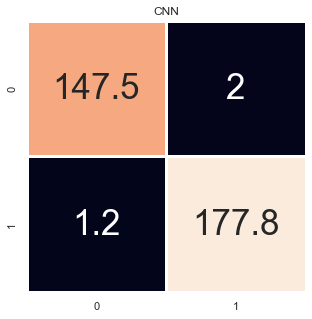

In [23]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.title.set_text('CNN')
cfm = [[mean(cv_results['test_tn']), mean(cv_results['test_fp'])],
    [mean(cv_results['test_fn']), mean(cv_results['test_tp'])]]
sns.heatmap(cfm, annot=True, annot_kws={"size": 35}, fmt='g', ax=ax, cbar=False, linewidths=3)

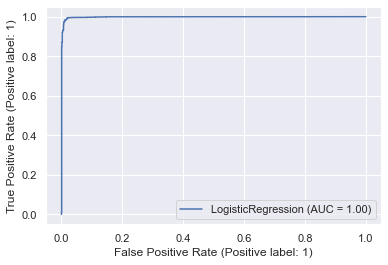

In [33]:
from sklearn import metrics

clf1 = clf1.fit(X_new, y)

metrics.RocCurveDisplay.from_estimator(clf1, X_new, y)
plt.show()

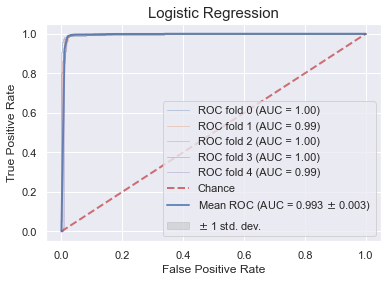

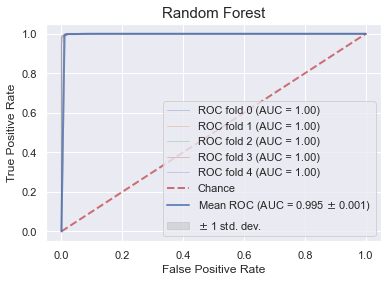

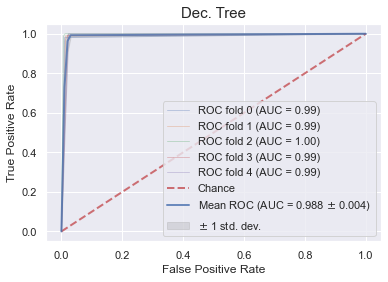

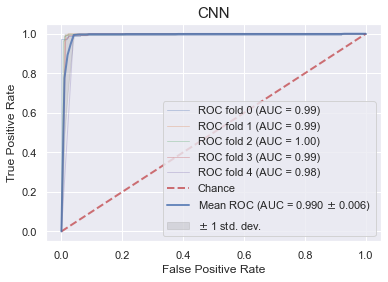

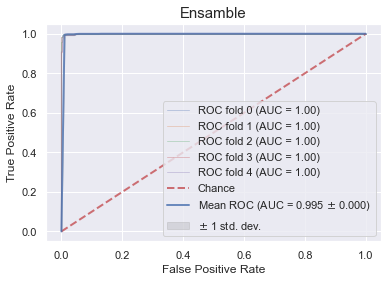

In [47]:
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold

X = X_new
n_samples, n_features = X.shape

# #############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=5)

for clf, label in zip(
    [clf1, clf2, clf3, clf4, eclf],
    ['Logistic Regression', 'Random Forest', 'Dec. Tree', 'CNN', 'Ensamble']):

    classifier = clf

    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots()
    for i, (train, test) in enumerate(cv.split(X, y)):

        classifier.fit(X[train], y[train])

        # Graph starts here
        viz = RocCurveDisplay.from_estimator(
            classifier,
            X[test],
            y[test],
            name="ROC fold {}".format(i),
            alpha=0.3,
            lw=1,
            ax=ax,
        )
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(
        mean_fpr,
        mean_tpr,
        color="b",
        label=r"Mean ROC (AUC = %0.3f $\pm$ %0.3f)" % (mean_auc, std_auc),
        lw=2,
        alpha=0.8,
    )

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(
        mean_fpr,
        tprs_lower,
        tprs_upper,
        color="grey",
        alpha=0.2,
        label=r"$\pm$ 1 std. dev.",
    )

    ax.set(
        xlim=[-0.05, 1.05],
        ylim=[-0.05, 1.05],
        title= label,
    )
    plt.title(label, fontsize = 15)
    ax.set_ylabel("True Positive Rate")
    ax.set_xlabel("False Positive Rate")
    
    ax.legend(loc="lower right")
    plt.show()